<a href="https://colab.research.google.com/github/RaminParker/langchain_chrash_course/blob/main/pdf_query_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

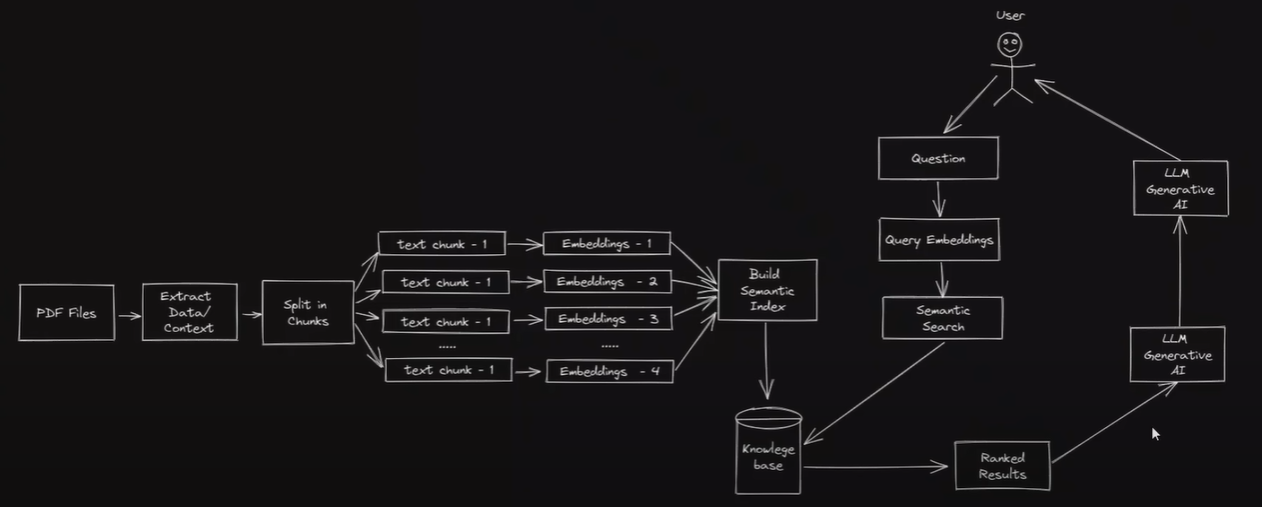

In [ ]:
!pip install langchain
!pip install openai
!pip install PyPDF2
!pip install faiss-cpu
!pip install tiktoken

In [ ]:
from PyPDF2 import PdfReader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import ElasticVectorSearch, Pinecone, Weaviate, FAISS

In [ ]:
# Mount your Google Drive on your Google Colab runtime
from google.colab import drive
drive.mount('/content/drive/')

path_to_key = "/content/drive/MyDrive/Colab Notebooks/configs/openai/token.txt" 
file1 = open(path_to_key, "r")
token_oai = file1.read()

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = token_oai

In [ ]:
# location of the pdf file/files. 
reader = PdfReader('/content/drive/MyDrive/Colab Notebooks/datasets/pdf/gpt4all.pdf')

In [ ]:
# read data from the file and put them into a variable called raw_text
raw_text = ''
for i, page in enumerate(reader.pages):
    text = page.extract_text()
    if text:
        raw_text += text

In [ ]:
raw_text

In [ ]:
# We need to split the text that we read into smaller chunks so that during information retreival we don't hit the token size limits. 

text_splitter = CharacterTextSplitter(        
    separator = "\n",
    chunk_size = 1000,    # make sure not to hit the max. token number
    chunk_overlap  = 200,
    length_function = len,
)
texts = text_splitter.split_text(raw_text)

Number of chunks:

In [ ]:
len(texts)

In [ ]:
texts[0]

In [ ]:
texts[1]

In [ ]:
# Download embeddings from OpenAI
embeddings = OpenAIEmbeddings()

Find the corresponding embeddings for our text chunks

In [ ]:
docsearch = FAISS.from_texts(texts, embeddings)

In [ ]:
from langchain.chains.question_answering import load_qa_chain
from langchain.llms import OpenAI

Choose a model --> [here](https://platform.openai.com/docs/models/gpt-3)

In [ ]:
#chain = load_qa_chain(OpenAI(model_name="davinci"), chain_type="stuff")
chain = load_qa_chain(OpenAI(), chain_type="stuff")

In [ ]:
query = "who are the authors of the article?"
docs = docsearch.similarity_search(query)
chain.run(input_documents=docs, question=query)

In [ ]:
query = "What was the cost of training the GPT4all model?"
docs = docsearch.similarity_search(query)
chain.run(input_documents=docs, question=query)

In [ ]:
query = "How was the model trained?"
docs = docsearch.similarity_search(query)
chain.run(input_documents=docs, question=query)

In [ ]:
query = "what was the size of the training dataset?"
docs = docsearch.similarity_search(query)
chain.run(input_documents=docs, question=query)

In [ ]:
query = "How is this different from other models?"
docs = docsearch.similarity_search(query)
chain.run(input_documents=docs, question=query)

In [ ]:
query = "What is Google Bard?"
docs = docsearch.similarity_search(query)
chain.run(input_documents=docs, question=query)